# A Test case file to predict the output of the model

In [ ]:
# import necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import LeakyReLU

In [3]:
# Load the trained model
model = load_model(
    '../5ADVANCED_TRAINING/Tuned_Model/CNN_TF_Tuned.keras',custom_objects={"LeakyReLU": LeakyReLU}  # Fix LeakyReLU issue
)
print('Model loaded successfully.')

# Load the dataset (cropped test set)
csv_path = '../2PREPROCESSING/Processed_CSV/cropped_test.csv'
data = pd.read_csv(csv_path)
print('Dataset loaded successfully.')

Model loaded successfully.
Dataset loaded successfully.


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


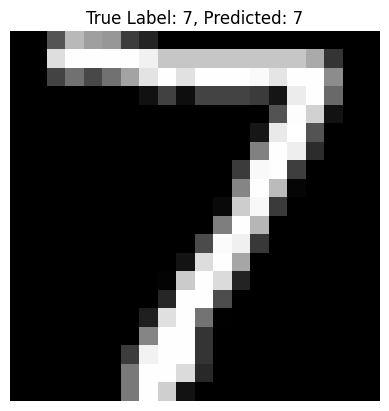

Model Prediction: 7


In [12]:
# img-lable
img_select = 0

# Extract the 0th image and reshape it for prediction
image_data = data.iloc[img_select, 1:].values  # Exclude label column
label = data.iloc[img_select, 0]  # True label

# Reshape to cropped image dimensions (20x20) and normalize
image = image_data.reshape(20, 20) / 255.0  

# Reshape for CNN input (batch_size, height, width, channels)
input_image = image.reshape(1, 20, 20, 1)  

# Make a prediction
prediction = model.predict(input_image)
predicted_label = np.argmax(prediction)  # Get the predicted digit

# Display the image and prediction
plt.imshow(image, cmap='gray')
plt.title(f"True Label: {label}, Predicted: {predicted_label}")
plt.axis('off')
plt.show()

# Print the predicted result
print(f"Model Prediction: {predicted_label}")